# DATA CLEANING

In [1]:
#importing required library
import pandas as pd
from pandas import DataFrame
import numpy as np


adult_data = 'adult.csv'

#Importing datasets from a offline directory by using pandas library.
adult = pd.read_csv(adult_data, sep = ',', header = None, names = ['Age','WorkClass','FinalWeight','Education',
                                                                   'EduNum','MaritalStatus','Occupation',
                                                                   'Relationship','Race','Sex','CapitalGain',
                                                                   'CapitalLoss','Weekhrs','NativeCountry','Salary'])

adult_data_2 = 'adult_test.csv'

adult_test = pd.read_csv(adult_data_2, sep = ',', header = None, names = ['Age','WorkClass','FinalWeight'
                                                                          ,'Education','EduNum','MaritalStatus'
                                                                          ,'Occupation','Relationship','Race','Sex'
                                                                          ,'CapitalGain','CapitalLoss','Weekhrs'
                                                                          ,'NativeCountry','Salary'], skiprows = 1)

#Combining the two dataframes, as the original data was pre-splited
cen_salary = pd.concat([adult,adult_test])

#validating the uploaded data using a sample of uploaded data
cen_salary.head(50)
cen_salary.tail(50)

#Checking unique values to observe the potential errors
cen_salary['WorkClass'].unique()
#Checking counts and the data types of the values
cen_salary['WorkClass'].value_counts()
#Removing whiteshapes
cen_salary['WorkClass'] = cen_salary['WorkClass'].str.strip()
#Replacing the unknown value with the NaN type
cen_salary['WorkClass'].replace( '?', np.nan, inplace= True)
#fixing typos using replace function
cen_salary['WorkClass'].replace( 'Private', 'private')
#Grouping Workclass with the similar Workclass types
cen_salary['WorkClass'] = cen_salary['WorkClass'].replace(['State-gov','Federal-gov',
                                                             'Local-gov'],'Government')
cen_salary['WorkClass'] = cen_salary['WorkClass'].replace(['Self-emp-not-inc','Self-emp-inc'],
                                                                  'Self-Employed')
cen_salary['WorkClass'] = cen_salary['WorkClass'].replace(['Without-pay','Never-worked'],
                                                                  'Unemployed')

#Checking unique values to observe the potential errors
cen_salary['MaritalStatus'].unique()
#Checking counts and the data types of the values
cen_salary['MaritalStatus'].value_counts()
#Removing whiteshapes
cen_salary['MaritalStatus'] = cen_salary['MaritalStatus'].str.strip() 
#Grouping Marital Status with the similar types present
cen_salary['MaritalStatus'] = cen_salary['MaritalStatus'].replace(['Divorced','Married-spouse-absent',
                                                             'Never-married','Separated','Widowed'],'Single')
cen_salary['MaritalStatus'] = cen_salary['MaritalStatus'].replace(['Married-AF-spouse','Married-civ-spouse'],
                                                                  'Married')


#Checking unique values to observe the potential errors
cen_salary['Relationship'].unique()
#Checking counts and the data types of the values
cen_salary['Relationship'].value_counts()
#Removing whiteshapes
cen_salary['Relationship'] = cen_salary['Relationship'].str.strip()


#Checking unique values to observe the potential errors
cen_salary['Race'].unique()
#Checking counts and the data types of the values
cen_salary['Race'].value_counts()
#Removing whiteshapes
cen_salary['Race'] = cen_salary['Race'].str.strip()

#Checking unique values to observe the potential errors
cen_salary['Sex'].unique()
#Checking counts and the data types of the values
cen_salary['Sex'].value_counts()
#Removing whiteshapes
cen_salary['Sex'] = cen_salary['Sex'].str.strip()

#Checking unique values to observe the potential errors
cen_salary['CapitalLoss'].unique()
#Checking counts and the data types of the values
cen_salary['CapitalLoss'].value_counts()
#Providing numeric label to the value which are greater than 1
cen_salary.loc[(cen_salary.CapitalLoss > 0) ,'CapitalLoss'] = 1
#Providing numeric label to the value which are equal to 0
cen_salary.loc[(cen_salary.CapitalLoss == 0) ,'CapitalLoss']= 0


#Checking unique values to observe the potential errors
cen_salary['CapitalGain'].unique()
#Checking counts and the data types of the values
cen_salary['CapitalGain'].value_counts()
#Providing numeric label to the value which are greater than 1
cen_salary.loc[(cen_salary.CapitalGain > 0) ,'CapitalGain'] = 1
#Providing numeric label to the value which are equal to 0
cen_salary.loc[(cen_salary.CapitalGain == 0) ,'CapitalGain']= 0


#Checking unique values to observe the potential errors
cen_salary['Occupation'].unique()
#Checking counts and the data types of the values
cen_salary['Occupation'].value_counts()
#Removing whiteshapes
cen_salary['Occupation'] = cen_salary['Occupation'].str.strip()
#Replacing the unknown value with the NaN type
cen_salary['Occupation'].replace( '?', np.nan, inplace= True)



#Checking unique values to observe the potential errors
cen_salary['NativeCountry'].unique()
#Checking counts and the data types of the values
cen_salary['NativeCountry'].value_counts()
#Removing whiteshapes
cen_salary['NativeCountry'] = cen_salary['NativeCountry'].str.strip()
#Replacing the unknown value with the NaN type
cen_salary['NativeCountry'].replace( '?', np.nan, inplace= True)
#Replacing Countries based on their respective continents
cen_salary['NativeCountry'] = cen_salary['NativeCountry'].replace(['India','Iran','Philippines','Cambodia',
                                                                   'Thailand','Laos','Taiwan','China','Japan',
                                                                   'Vietnam','Hong'],'Asia')
cen_salary['NativeCountry'] = cen_salary['NativeCountry'].replace(['United-States','Cuba','Jamaica','Mexico',
         'Puerto-Rico','Honduras','Canada','Columbia','Ecuador','Haiti','Dominican-Republic',
         'El-Salvador','Guatemala','Peru','Outlying-US(Guam-USVI-etc)','Trinadad&Tobago','Nicaragua'],'America')
cen_salary['NativeCountry'] = cen_salary['NativeCountry'].replace(['England','Germany','Poland','Portugal',
                                                                   'France','Italy','Yugoslavia','Scotland','Greece',
                                                                   'Ireland','Hungary','Holand-Netherlands'],'Europe')

indexCountry = cen_salary[cen_salary['NativeCountry'] == 'South'].index
#Droping rows with the invalid country name
cen_salary.drop(indexCountry,inplace = True)

#Checking unique values to observe the potential errors
cen_salary['Salary'].unique()
#Checking counts and the data types of the values
cen_salary['Salary'].value_counts()
#Removing whiteshapes
cen_salary['Salary'] = cen_salary['Salary'].str.strip()
#Removing typos
cen_salary['Salary'].replace( '<=50K.', '<=50K', inplace = True)
cen_salary['Salary'].replace( '>50K.', '>50K', inplace = True)
#Mapping values inside salary attribute to numeric label for modeling purpose
cen_salary['Salary'] = cen_salary['Salary'].map({ "<=50K": 0, ">50K": 1 })

#Checking unique values to observe the potential errors
cen_salary['Age'].unique()
#Checking counts and the data types of the values
cen_salary['Age'].value_counts()
#Converting each value into Integer data type
cen_salary['Age'] = cen_salary['Age'].astype(int)

#Checking unique values to observe the potential errors
cen_salary['FinalWeight'].unique()
#Checking counts and the data types of the values
cen_salary['FinalWeight'].value_counts()
#Converting each value into float data type
cen_salary['FinalWeight'] = cen_salary['FinalWeight'].astype(float)

#Checking unique values to observe the potential errors
cen_salary['EduNum'].unique()
#Checking counts and the data types of the values
cen_salary['EduNum'].value_counts()
#Converting each value into float data type
cen_salary['EduNum']= cen_salary['EduNum'].astype(float)

#Checking unique values to observe the potential errors
cen_salary['Education'].unique()
#Checking counts and the data types of the values
cen_salary['Education'].value_counts()
#Removing whiteshapes
cen_salary['Education'] = cen_salary['Education'].str.strip()
#Grouping Education based on the similarity
cen_salary['Education'] = cen_salary['Education'].replace(['1st-4th','12th','Preschool','HS-grad','10th','5th-6th'
                                                           ,'7th-8th','11th','9th'],'School')
cen_salary['Education'] = cen_salary['Education'].replace(['Some-college','Bachelors','Prof-school','Assoc-voc'
                                                           ,'Assoc-acdm'],'Bachelors')

#Checking unique values to observe the potential errors
cen_salary['Weekhrs'].unique()
#Checking counts and the data types of the values
cen_salary['Weekhrs'].value_counts()
#Converting each value into Integer data type
cen_salary['Weekhrs'] = cen_salary['Weekhrs'].astype(int)

#Removing all the NaN values present
cen_salary.dropna(inplace = True)


# DATA EXPLORATION

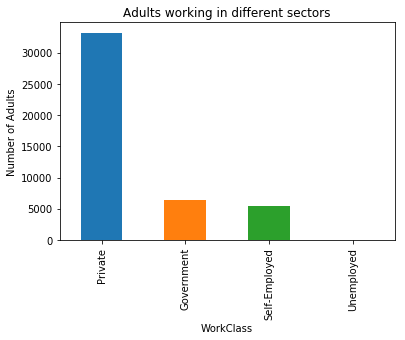

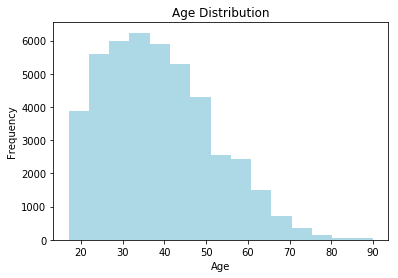

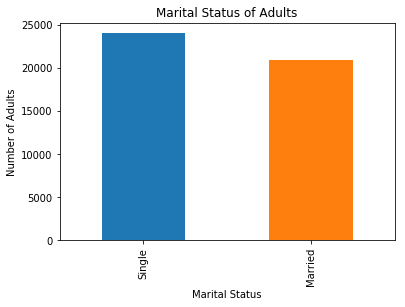

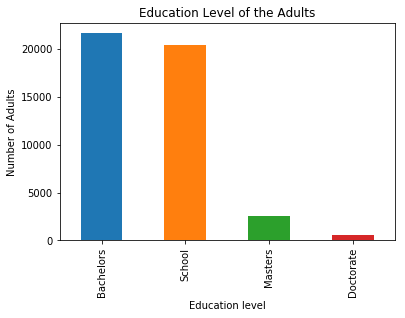

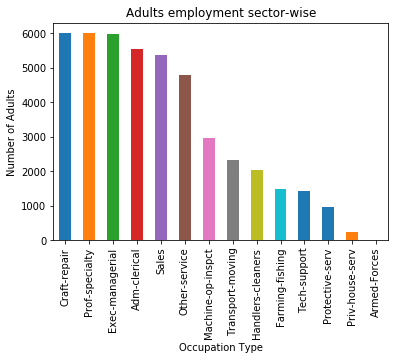

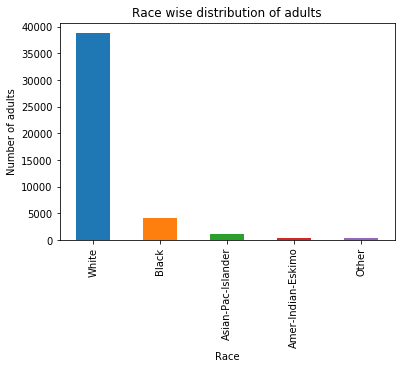

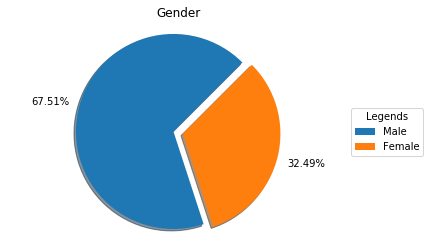

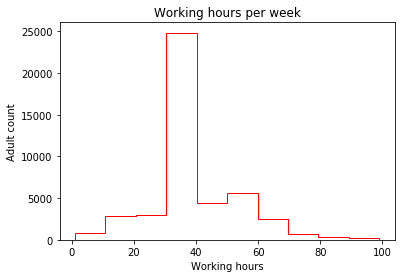

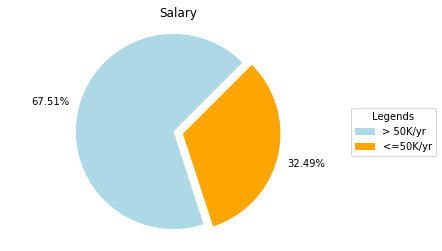

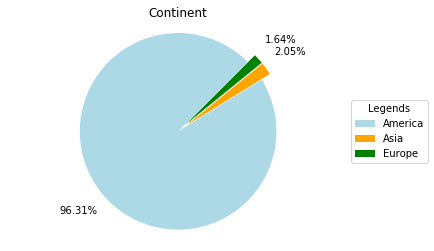

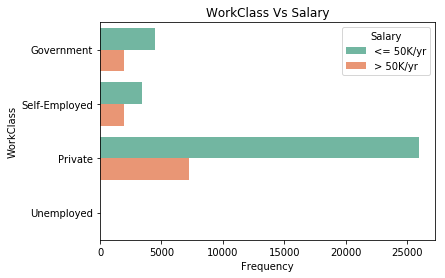

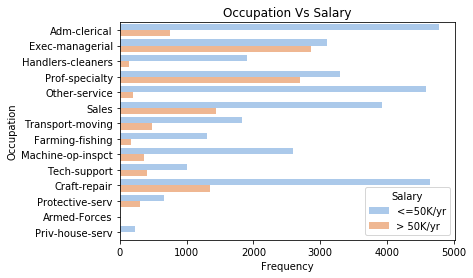

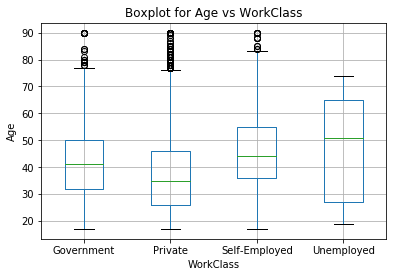

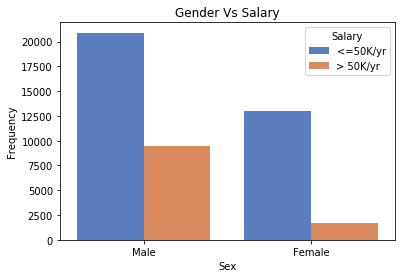

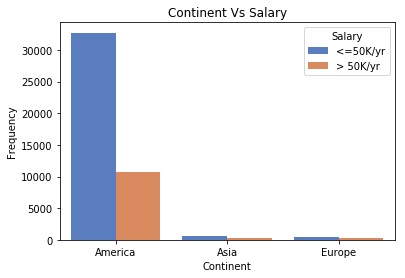

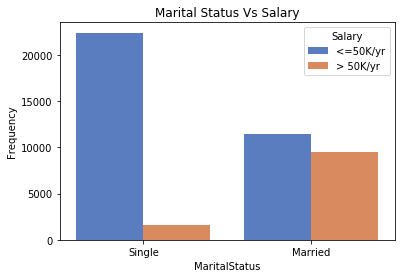

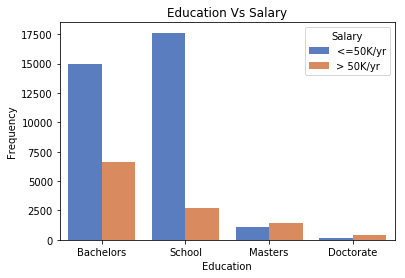

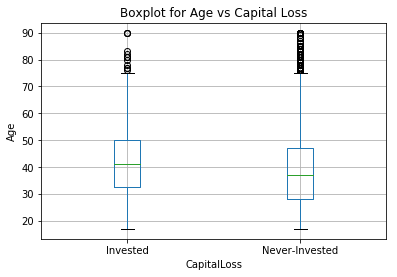

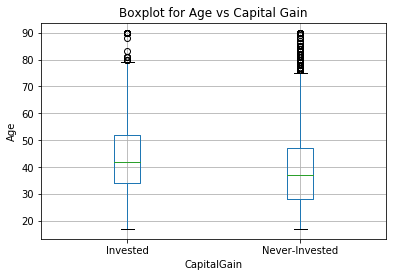

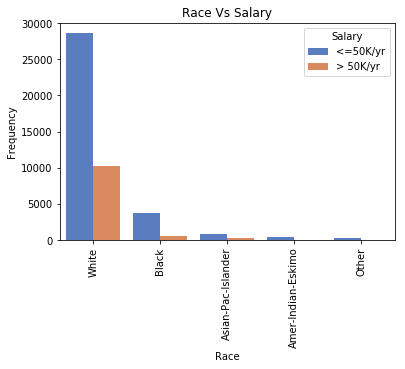

In [2]:
#Importing required library for Data Exploration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Creating bar plot for WorkClass
cen_salary['WorkClass'].value_counts().plot(kind = 'bar')
plt.title('Adults working in different sectors')
plt.ylabel('Number of Adults')
plt.xlabel('WorkClass')
plt.show()

#Creating histogram for Age
cen_salary['Age'].plot(kind = 'hist', color ='lightblue',bins = 15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

#Creating bar plot for Marital Status
cen_salary['MaritalStatus'].value_counts().plot(kind = 'bar')
plt.title('Marital Status of Adults')
plt.ylabel('Number of Adults')
plt.xlabel('Marital Status')
plt.show()

#Creating bar plot for Education
cen_salary['Education'].value_counts().plot(kind = 'bar')
plt.title('Education Level of the Adults')
plt.ylabel('Number of Adults')
plt.xlabel('Education level')
plt.show()

#Creating bar plot for Occupation
cen_salary['Occupation'].value_counts().plot(kind = 'bar')
plt.title('Adults employment sector-wise')
plt.ylabel('Number of Adults')
plt.xlabel('Occupation Type')
plt.show()

#Creating bar plot for Race
cen_salary['Race'].value_counts().plot(kind = 'bar')
plt.title('Race wise distribution of adults')
plt.ylabel('Number of adults')
plt.xlabel('Race')
plt.show()

#Creating Pie Chart for Sex
labels = cen_salary['Sex'].unique()
sizes = cen_salary['Sex'].value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=True, startangle=45, pctdistance=1.3, labeldistance=0)
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Gender")
plt.show()

#Creating histogram for Week hours
cen_salary['Weekhrs'].plot(kind = 'hist', bins = 10,color ='red',histtype = 'step')
plt.title('Working hours per week')
plt.xlabel('Working hours')
plt.ylabel('Adult count')
plt.show()

#Creating Pie Chart for Salary
labels = '> 50K/yr', '<=50K/yr'
sizes = cen_salary['Sex'].value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow= False, startangle=45, pctdistance=1.3, labeldistance=0,
        colors = ('lightblue','orange'))
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Salary")
plt.show()


#Creating Pie Chart for Native Country
labels = cen_salary['NativeCountry'].unique()
sizes = cen_salary['NativeCountry'].value_counts()
explode = (0,0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=False, startangle=45, pctdistance=1.3, labeldistance=0,
        colors = ('lightblue','orange','green'))
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Continent")
plt.show()

#Creating count plot to find relationship between workclass and salary
graph1 = sns.countplot(y= "WorkClass", hue= "Salary", data= cen_salary, palette="Set2")
plt.legend(title = 'Salary', labels = ['<= 50K/yr','> 50K/yr'])
plt.title('WorkClass Vs Salary')
plt.xlabel('Frequency')
plt.show(graph1)

#Creating count plot to find relationship between occupation and salary
graph2 = sns.countplot(y="Occupation", hue="Salary", data= cen_salary, palette='pastel')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Occupation Vs Salary')
plt.xlabel('Frequency')
plt.show(graph2)

#creating boxplot to visualize the relationship between Age and WorkClass
graph3 = cen_salary.boxplot(column='Age',by='WorkClass')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Boxplot for Age vs WorkClass')
plt.show(graph3)

#Creating count plot to find relationship between Sex and salary
graph4 = sns.countplot(x="Sex", hue="Salary", data= cen_salary,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Gender Vs Salary')
plt.ylabel('Frequency')
plt.show(graph4)

#Creating count plot to find relationship between Continents(Countries) and salary
graph5 = sns.countplot(x="NativeCountry", hue="Salary", data= cen_salary,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Continent Vs Salary')
plt.xlabel('Continent')
plt.ylabel('Frequency')
plt.show(graph5)


#Creating count plot to find relationship between Marital Status and salary
graph6 = sns.countplot(x="MaritalStatus", hue="Salary", data= cen_salary,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Marital Status Vs Salary')
plt.show(graph6)

#Creating count plot to visualize the relationship between Education and Salary
graph7 = sns.countplot(x="Education", hue="Salary", data= cen_salary,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Education Vs Salary')
plt.show(graph7)

#Creating a copy of original dataset
temp_cen_salary = cen_salary.copy()
#Mapping numerical values to categorical values for the purpose of visualization
temp_cen_salary['CapitalLoss'] = cen_salary['CapitalLoss'].map({ 0 : "Never-Invested", 1: "Invested" })
#Creating Boxplot to visualize the relationship between Age and CaptialLoss
graph8 = temp_cen_salary.boxplot(column='Age',by='CapitalLoss')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Boxplot for Age vs Capital Loss')
plt.show(graph8)

#Mapping numerical values to categorical values for the purpose of visualization
temp_cen_salary['CapitalGain'] = cen_salary['CapitalGain'].map({ 0 : "Never-Invested", 1: "Invested" })
#Creating Boxplot to visualize the relationship between Age and CaptialLoss
graph9 = temp_cen_salary.boxplot(column='Age',by='CapitalGain')
plt.ylabel('Age')
plt.suptitle("")
plt.title('Boxplot for Age vs Capital Gain')
plt.show(graph9)

#Creating count plot to find relationship between Race and salary
graph10 = sns.countplot(x="Race", hue="Salary", data= cen_salary,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Race Vs Salary')
plt.xticks(rotation='vertical')
plt.show(graph10)

# DATA PREPARATION AND MODELLING  

In [3]:
#Mapping Categorical Values to Numeric for the following attributes

cen_salary['Sex'] = cen_salary['Sex'].map({'Male':1,'Female':0})

map_relationship = {'Own-child':1,'Wife':1,'Husband':2,'Unmarried':3,'Not-in-family':4,'Other-relative':5}
cen_salary['Relationship'] = cen_salary['Relationship'].map(map_relationship)

map_race = {'Amer-Indian-Eskimo':0,'Asian-Pac-Islander':1, 'White':2,'Black':3,'Other':4 }
cen_salary['Race']= cen_salary['Race'].map(map_race)

cen_salary['WorkClass'] = cen_salary['WorkClass'].map({ "Private": 0, "Government": 1,"Self-Employed": 2,"Unemployed":3})
cen_salary['MaritalStatus'] = cen_salary['MaritalStatus'].map({ "Married": 0, "Single": 1})
cen_salary['NativeCountry'] = cen_salary['NativeCountry'].map({ "America": 0, "Asia": 1,"Europe":2})

map_occupation = {'Exec-managerial' : 0, 'Handlers-cleaners' : 1, 'Prof-specialty' : 2, 'Other-service' : 3, 
                  'Adm-clerical' : 4, 'Sales' : 5, 'Transport-moving' : 6, 'Farming-fishing' : 7,
                  'Machine-op-inspct' : 8, 'Tech-support' : 9, 'Craft-repair' : 10, 'Protective-serv' : 11,
                  'Armed-Forces' : 12, 'Priv-house-serv' : 13 }
cen_salary['Occupation'] = cen_salary['Occupation'].map(map_occupation)
                  

#Dropping Education as the another column "EduNum" already fulfilling the purpose
cen_salary.drop(labels=['Education'],axis=1,inplace=True)
#Dropping FinalWeight as the data is irrelevant
cen_salary.drop(labels=['FinalWeight'],axis=1,inplace=True)




In [4]:
#Validating the changes in the dataset
cen_salary.head()

,Age,WorkClass,EduNum,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,Weekhrs,NativeCountry,Salary
0,39,1,13.0,1,4,4,2,1,1,0,40,0,0
1,50,2,13.0,0,0,2,2,1,0,0,13,0,0
2,38,0,9.0,1,1,4,2,1,0,0,40,0,0
3,53,0,7.0,0,1,2,3,1,0,0,40,0,0
4,28,0,13.0,0,2,1,3,0,0,0,40,0,0


In [5]:
#Selecting the data for modelling
salary_data = cen_salary.iloc[:,0:12].values
#Selecting the target/Class label variable
salary_target = cen_salary.iloc[:,12:13].values
#Reshaping the target variable into a 1-D Array
salary_target = salary_target.flatten()

#Validating the shape
salary_data.shape
salary_target.shape

(45048,)

In [ ]:
#Importing libraries required for modelling
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 

#Implementing KNN
#With K =23
#50% for training and 50% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
#Shuffling the column selection 
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
#Creating a For-Loop to iterate from 0 to col_num
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.5, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n" 
        print "Selected Index : " + str(new_Ind) + "\n"
        
        
print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

In [7]:
#Implementing KNN
#With K =23
#60% for training and 40% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.4, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n"
        print "Selected Index : " + str(new_Ind) + "\n"
        
print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7540510543840178

Selected Index : [7]

Score with 2 selected features: 0.7540510543840178

Selected Index : [7, 5]

Score with 3 selected features: 0.8013873473917869

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.8019422863485016

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8105438401775805

Selected Index : [7, 5, 2, 9, 4]

Score with 6 selected features: 0.8212541620421754

Selected Index : [7, 5, 2, 9, 4, 8]

Score with 7 selected features: 0.823418423973363

Selected Index : [7, 5, 2, 9, 4, 8, 1]

Score with 8 selected features: 0.8271365149833518

Selected Index : [7, 5, 2, 9, 4, 8, 1, 3]

[[12453  1135]
 [ 1980  2452]]
The Error Rate is 0.17

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     13588
           1       0.68      0.55      0.61      4432

   micro avg       0.83      0.83      0.83     18020
   macro avg       0.77      0.73      0.75     1802

In [8]:
#Implementing KNN
#With K =23
#80% for training and 20% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, salary_target, test_size=0.2, random_state=0)
    clf = KNeighborsClassifier(23, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n"
        print "Selected Index : " + str(new_Ind) + "\n"
        
print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7567147613762486

Selected Index : [7]

Score with 2 selected features: 0.7774694783573807

Selected Index : [7, 2]

Score with 3 selected features: 0.7894561598224196

Selected Index : [7, 2, 9]

Score with 4 selected features: 0.7941176470588235

Selected Index : [7, 2, 9, 4]

Score with 5 selected features: 0.8109877913429523

Selected Index : [7, 2, 9, 4, 8]

Score with 6 selected features: 0.8287458379578246

Selected Index : [7, 2, 9, 4, 8, 3]

[[6257  561]
 [ 982 1210]]
The Error Rate is 0.17

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6818
           1       0.68      0.55      0.61      2192

   micro avg       0.83      0.83      0.83      9010
   macro avg       0.77      0.73      0.75      9010
weighted avg       0.82      0.83      0.82      9010



In [9]:
#Implementing Decision Tree
#50% for training and 50% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,salary_target,test_size=0.5,random_state=0)
    clf = DecisionTreeClassifier(criterion = 'gini',max_depth=None, min_samples_split=2, min_samples_leaf=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n"
        print "Selected Index : " + str(new_Ind) + "\n"
    

print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7538181495293909

Selected Index : [7]

Score with 2 selected features: 0.7538181495293909

Selected Index : [7, 5]

Score with 3 selected features: 0.8149085419996448

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.8162404546261766

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8193038536671994

Selected Index : [7, 5, 2, 9, 4]

Score with 6 selected features: 0.8284940507902682

Selected Index : [7, 5, 2, 9, 4, 8]

Score with 7 selected features: 0.8323565974072101

Selected Index : [7, 5, 2, 9, 4, 8, 3]

[[15680  1299]
 [ 2477  3068]]
The Error Rate is 0.17

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     16979
           1       0.70      0.55      0.62      5545

   micro avg       0.83      0.83      0.83     22524
   macro avg       0.78      0.74      0.76     22524
weighted avg       0.82      0.83      0.83     22524



In [11]:
#Implementing Decision Tree
#60% for training and 40% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,salary_target,test_size=0.4,random_state=0)
    clf = DecisionTreeClassifier(criterion = 'gini',max_depth=None, min_samples_split=2, min_samples_leaf=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n"
        print "Selected Index : " + str(new_Ind) + "\n"
    

print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7540510543840178

Selected Index : [7]

Score with 2 selected features: 0.7540510543840178

Selected Index : [7, 5]

Score with 3 selected features: 0.8158157602663707

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.8165926748057714

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8190344062153163

Selected Index : [7, 5, 2, 9, 4]

Score with 6 selected features: 0.8276914539400666

Selected Index : [7, 5, 2, 9, 4, 8]

Score with 7 selected features: 0.831465038845727

Selected Index : [7, 5, 2, 9, 4, 8, 3]

[[12545  1043]
 [ 1994  2438]]
The Error Rate is 0.17

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     13588
           1       0.70      0.55      0.62      4432

   micro avg       0.83      0.83      0.83     18020
   macro avg       0.78      0.74      0.75     18020
weighted avg       0.82      0.83      0.82     18020



In [12]:
#Implementing Decision Tree
#80% for training and 20% for testing

new_Ind = []
cur_MaxScore = 0.0
col_num = 12
col_Ind_Random = shuffle(range(0,col_num), random_state=5)
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = salary_data[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,salary_target,test_size=0.2,random_state=0)
    clf = DecisionTreeClassifier(criterion = 'gini',max_depth=None, min_samples_split=2, min_samples_leaf=1)
    fit = clf.fit(X_train, y_train)
    y_pre = fit.predict(X_test)
    cur_Score = clf.score(X_test, y_test)
    y_pre = fit.predict(X_test)
    cm = confusion_matrix(y_test, y_pre)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        error_rate = 1 - cur_Score
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score) +"\n"
        print "Selected Index : " + str(new_Ind) + "\n"
    

print cm
print "The Error Rate is " + str(round(error_rate,2)) + "\n"
print classification_report(y_test,y_pre)

Score with 1 selected features: 0.7567147613762486

Selected Index : [7]

Score with 2 selected features: 0.7567147613762486

Selected Index : [7, 5]

Score with 3 selected features: 0.8200887902330743

Selected Index : [7, 5, 2]

Score with 4 selected features: 0.8211986681465039

Selected Index : [7, 5, 2, 9]

Score with 5 selected features: 0.8244173140954495

Selected Index : [7, 5, 2, 9, 4]

Score with 6 selected features: 0.8299667036625971

Selected Index : [7, 5, 2, 9, 4, 8]

Score with 7 selected features: 0.8327413984461709

Selected Index : [7, 5, 2, 9, 4, 8, 3]

[[6292  526]
 [ 981 1211]]
The Error Rate is 0.17

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6818
           1       0.70      0.55      0.62      2192

   micro avg       0.83      0.83      0.83      9010
   macro avg       0.78      0.74      0.75      9010
weighted avg       0.82      0.83      0.83      9010



In [14]:
#Used to visualize the decision tree
from sklearn import tree
with open("Salary.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)